In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import time
import sys
import os

In [2]:
# preamble for jupyter notebook and django
import django
import platform

if platform.node() == "mcc-apsis":
    sys.path.append('/home/leey/tmv/BasicBrowser/')
else:
    # local paths
    sys.path.append('/media/Data/MCC/tmv/BasicBrowser/')

os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

# import from appended path
import parliament.models as pm
from parliament.tasks import do_search, run_tm
import cities.models as cmodels
from django.contrib.auth.models import User
from tmv_app.models import *
from utils.tm_mgmt import update_topic_scores
from django.db.models import Q, Count, Func, F, Sum, Avg, Value as V

from utils.topic_comparison import compare_topic_queryset, save_res, sort_matrix, draw_score_matrix
from utils.topic_comparison import save_topic_list_as_table, draw_bipartite_topic_graph, bipartite_graph_from_matrix

In [ ]:
#NM runs = 968, 969, 970, 971 (for K=20-50)
#LD runs = 972, 973, 974, 975 (for K=20-50)

## NM method ##

In [42]:
# Compares NMF methods for K=20 and K= 30
K1 = 20
K2 = 30
method = 'NM'
search_word = "Kohle"
run_id1 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method, K=K1).run_id
run_id2 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method, K=K2).run_id

stat1 = RunStats.objects.get(pk=run_id1)
topics1 = Topic.objects.filter(run_id=stat1.parent_run_id).order_by('-score')

stat2 = RunStats.objects.get(pk=run_id2)
topics2 = Topic.objects.filter(run_id=stat2.parent_run_id).order_by('-score')

['run_968_topics_20', 'scores_968', 'similarity_968-969', 'run_969_topics_30', 'scores_969']
C2:C30
matching sum:	152.0
max rows:	152.0
max cols:	185.0


0

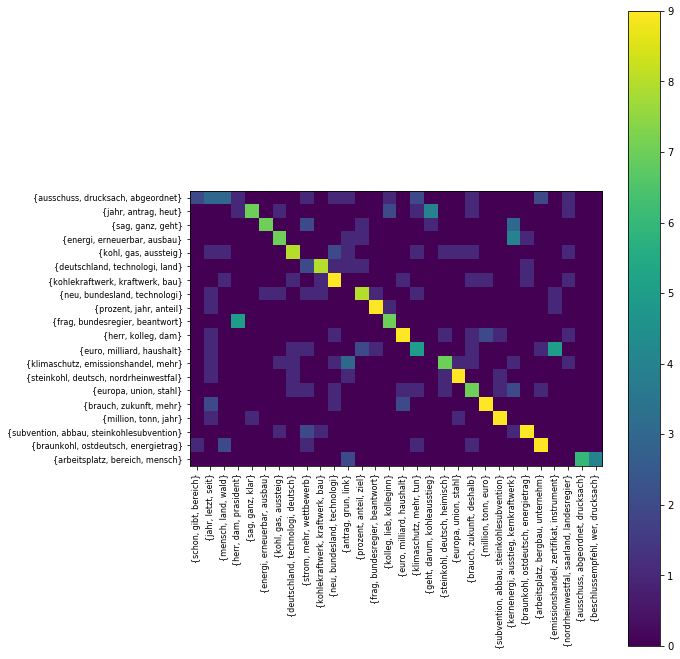

In [43]:
# Compares NMF methods for K=20 and K= 30
% matplotlib inline

runs = [run_id1, run_id2]
runs = RunStats.objects.filter(pk__in=runs).order_by('K')

res_tw, ss, score_matrix = compare_topic_queryset(runs, order_by_str='-score')

options = {'fname': "/home/leey/coal-discourse"}
save_res(runs, [res_tw,ss], options)

#draw_score_matrix(score_matrix, topics1, topics2, match=True, filename="topword_score_matrix_{}_{}_K{}.pdf".format(search_word, method, K))
draw_score_matrix(score_matrix, topics1, topics2, match=True, filename="topword_score_matrix_{}_{}_K{}_{}.png".format(search_word, method, K1, K2))

In [44]:
# Compares NMF methods for K=30 and K= 40
K1 = 30
K2 = 40
method = 'NM'
search_word = "Kohle"
run_id1 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method, K=K1).run_id
run_id2 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method, K=K2).run_id

stat1 = RunStats.objects.get(pk=run_id1)
topics1 = Topic.objects.filter(run_id=stat1.parent_run_id).order_by('-score')

stat2 = RunStats.objects.get(pk=run_id2)
topics2 = Topic.objects.filter(run_id=stat2.parent_run_id).order_by('-score')

['run_969_topics_30', 'scores_969', 'similarity_969-970', 'run_970_topics_40', 'scores_970']
C2:C40
matching sum:	222.0
max rows:	225.0
max cols:	253.0


0

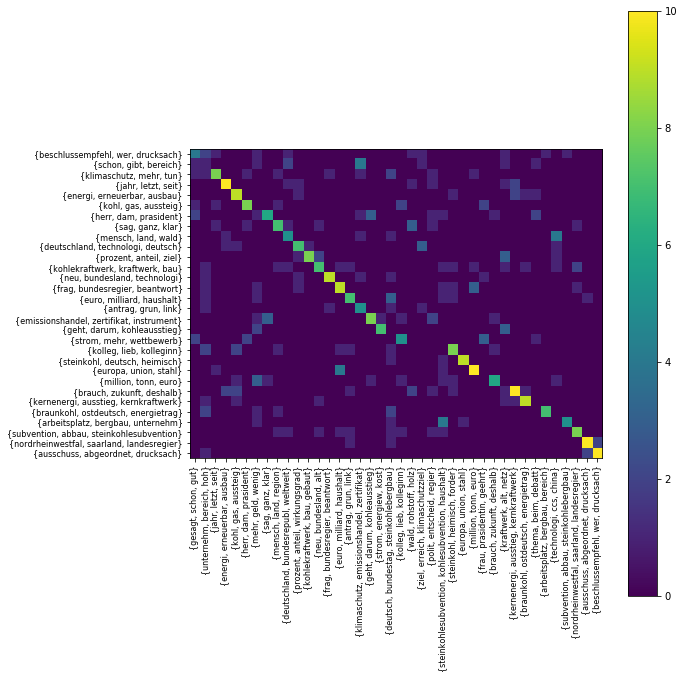

In [45]:
# Compares NMF methods for K=30 and K= 40
% matplotlib inline

runs = [run_id1, run_id2]
runs = RunStats.objects.filter(pk__in=runs).order_by('K')

res_tw, ss, score_matrix = compare_topic_queryset(runs, order_by_str='-score')

options = {'fname': "/home/leey/coal-discourse"}
save_res(runs, [res_tw,ss], options)

#draw_score_matrix(score_matrix, topics1, topics2, match=True, filename="topword_score_matrix_{}_{}_K{}.pdf".format(search_word, method, K))
draw_score_matrix(score_matrix, topics1, topics2, match=True, filename="topword_score_matrix_{}_{}_K{}_{}.png".format(search_word, method, K1, K2))

In [46]:
# Compares NMF methods for K=40 and K= 50
K1 = 40
K2 = 50
method = 'NM'
search_word = "Kohle"
run_id1 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method, K=K1).run_id
run_id2 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method, K=K2).run_id

stat1 = RunStats.objects.get(pk=run_id1)
topics1 = Topic.objects.filter(run_id=stat1.parent_run_id).order_by('-score')

stat2 = RunStats.objects.get(pk=run_id2)
topics2 = Topic.objects.filter(run_id=stat2.parent_run_id).order_by('-score')

['run_970_topics_40', 'scores_970', 'similarity_970-971', 'run_971_topics_50', 'scores_971']
C2:C50
matching sum:	314.0
max rows:	317.0
max cols:	345.0


0

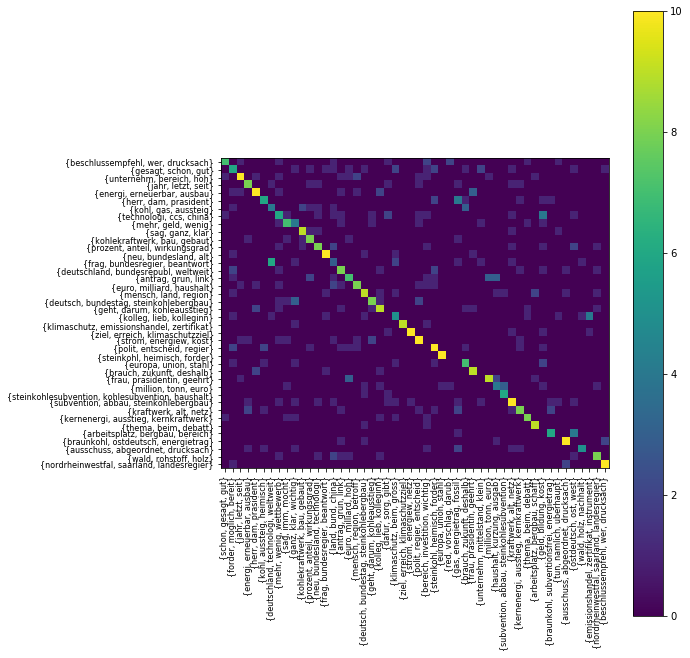

In [47]:
# Compares NMF methods for K=40 and K= 50
% matplotlib inline

runs = [run_id1, run_id2]
runs = RunStats.objects.filter(pk__in=runs).order_by('K')

res_tw, ss, score_matrix = compare_topic_queryset(runs, order_by_str='-score')

options = {'fname': "/home/leey/coal-discourse"}
save_res(runs, [res_tw,ss], options)

#draw_score_matrix(score_matrix, topics1, topics2, match=True, filename="topword_score_matrix_{}_{}_K{}.pdf".format(search_word, method, K))
draw_score_matrix(score_matrix, topics1, topics2, match=True, filename="topword_score_matrix_{}_{}_K{}_{}.png".format(search_word, method, K1, K2))

## LDA method ##

In [36]:
# Compares LDA methods for K=20 and K= 30
K1 = 20
K2 = 30
method = 'LD'
search_word = "Kohle"
run_id1 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method, K=K1).run_id
run_id2 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method, K=K2).run_id

stat1 = RunStats.objects.get(pk=run_id1)
topics1 = Topic.objects.filter(run_id=stat1.parent_run_id).order_by('-score')

stat2 = RunStats.objects.get(pk=run_id2)
topics2 = Topic.objects.filter(run_id=stat2.parent_run_id).order_by('-score')

['run_972_topics_20', 'scores_972', 'similarity_972-973', 'run_973_topics_30', 'scores_973']
C2:C30
matching sum:	66.0
max rows:	68.0
max cols:	93.0


0

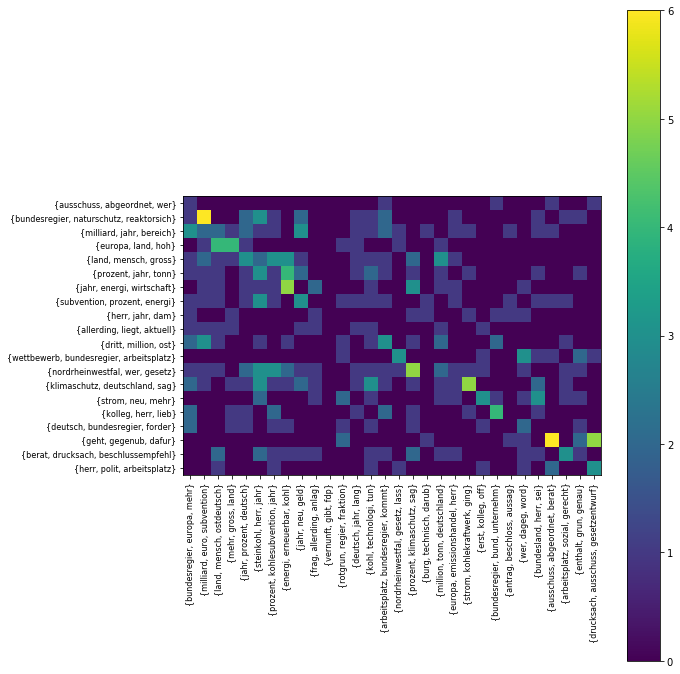

In [37]:
# Compares LDA methods for K=20 and K= 30
% matplotlib inline

runs = [run_id1, run_id2]
runs = RunStats.objects.filter(pk__in=runs).order_by('K')

res_tw, ss, score_matrix = compare_topic_queryset(runs, order_by_str='-score')

options = {'fname': "/home/leey/coal-discourse"}
save_res(runs, [res_tw,ss], options)

#draw_score_matrix(score_matrix, topics1, topics2, match=True, filename="topword_score_matrix_{}_{}_K{}.pdf".format(search_word, method, K))
draw_score_matrix(score_matrix, topics1, topics2, match=True, filename="topword_score_matrix_{}_{}_K{}_{}.png".format(search_word, method, K1, K2))

In [38]:
# Compares LDA methods for K=30 and K= 40
K1 = 30
K2 = 40
method = 'LD'
search_word = "Kohle"
run_id1 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method, K=K1).run_id
run_id2 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method, K=K2).run_id

stat1 = RunStats.objects.get(pk=run_id1)
topics1 = Topic.objects.filter(run_id=stat1.parent_run_id).order_by('-score')

stat2 = RunStats.objects.get(pk=run_id2)
topics2 = Topic.objects.filter(run_id=stat2.parent_run_id).order_by('-score')

['run_973_topics_30', 'scores_973', 'similarity_973-974', 'run_974_topics_40', 'scores_974']
C2:C40
matching sum:	93.0
max rows:	100.0
max cols:	124.0


0

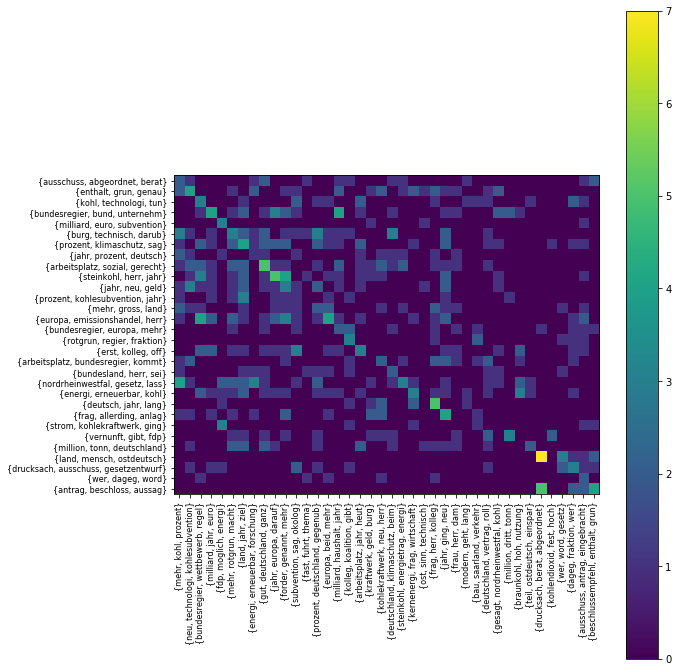

In [39]:
# Compares LDA methods for K=30 and K= 40
% matplotlib inline

runs = [run_id1, run_id2]
runs = RunStats.objects.filter(pk__in=runs).order_by('K')

res_tw, ss, score_matrix = compare_topic_queryset(runs, order_by_str='-score')

options = {'fname': "/home/leey/coal-discourse"}
save_res(runs, [res_tw,ss], options)

#draw_score_matrix(score_matrix, topics1, topics2, match=True, filename="topword_score_matrix_{}_{}_K{}.pdf".format(search_word, method, K))
draw_score_matrix(score_matrix, topics1, topics2, match=True, filename="topword_score_matrix_{}_{}_K{}_{}.png".format(search_word, method, K1, K2))

In [40]:
# Compares LDA methods for K=40 and K= 50
K1 = 40
K2 = 50
method = 'LD'
search_word = "Kohle"
run_id1 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method, K=K1).run_id
run_id2 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method, K=K2).run_id

stat1 = RunStats.objects.get(pk=run_id1)
topics1 = Topic.objects.filter(run_id=stat1.parent_run_id).order_by('-score')

stat2 = RunStats.objects.get(pk=run_id2)
topics2 = Topic.objects.filter(run_id=stat2.parent_run_id).order_by('-score')

['run_974_topics_40', 'scores_974', 'similarity_974-975', 'run_975_topics_50', 'scores_975']
C2:C50
matching sum:	126.0
max rows:	135.0
max cols:	152.0


0

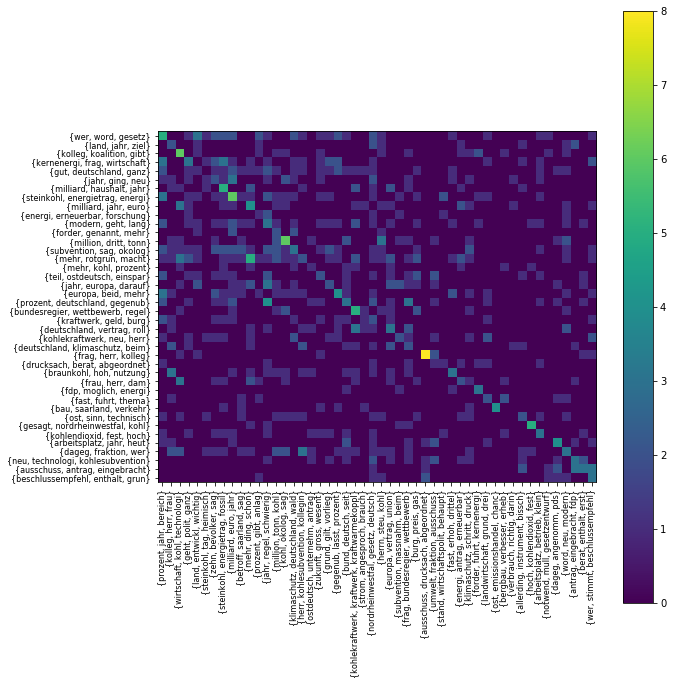

In [41]:
# Compares LDA methods for K=40 and K= 50
% matplotlib inline

runs = [run_id1, run_id2]
runs = RunStats.objects.filter(pk__in=runs).order_by('K')

res_tw, ss, score_matrix = compare_topic_queryset(runs, order_by_str='-score')

options = {'fname': "/home/leey/coal-discourse"}
save_res(runs, [res_tw,ss], options)

#draw_score_matrix(score_matrix, topics1, topics2, match=True, filename="topword_score_matrix_{}_{}_K{}.pdf".format(search_word, method, K))
draw_score_matrix(score_matrix, topics1, topics2, match=True, filename="topword_score_matrix_{}_{}_K{}_{}.png".format(search_word, method, K1, K2))

## NM and LD uisng top word overlap ##

In [19]:
method1 = 'NM'
method2 = 'LD'

In [21]:
K=20
search_word = "Kohle"
run_id1 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method1, K=K).run_id
run_id2 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method2, K=K).run_id

stat1 = RunStats.objects.get(pk=run_id1)
topics1 = Topic.objects.filter(run_id=stat1.parent_run_id).order_by('-score')

stat2 = RunStats.objects.get(pk=run_id2)
topics2 = Topic.objects.filter(run_id=stat2.parent_run_id).order_by('-score')

['run_968_topics_20', 'scores_968', 'similarity_968-972', 'run_972_topics_20', 'scores_972']
C2:C20
matching sum:	49.0
max rows:	54.0
max cols:	59.0


0

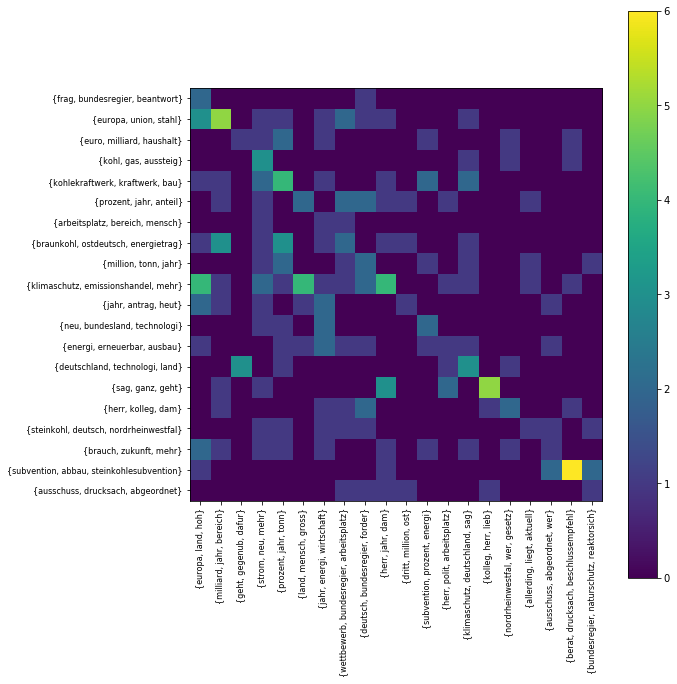

In [22]:
# Compares NMF and LDA methods for K=20
% matplotlib inline

runs = [run_id1, run_id2]
runs = RunStats.objects.filter(pk__in=runs).order_by('K')

res_tw, ss, score_matrix = compare_topic_queryset(runs, order_by_str='-score')

options = {'fname': "/home/leey/coal-discourse"}
save_res(runs, [res_tw,ss], options)

#draw_score_matrix(score_matrix, topics1, topics2, match=True, filename="topword_score_matrix_{}_{}_K{}.pdf".format(search_word, method, K))
draw_score_matrix(score_matrix, topics1, topics2, match=True, filename="topword_score_matrix_{}_{}_vs_{}_K{}.png".format(search_word, method1, method2,  K))

In [30]:
K=30
search_word = "Kohle"
run_id1 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method1, K=K).run_id
run_id2 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method2, K=K).run_id

stat1 = RunStats.objects.get(pk=run_id1)
topics1 = Topic.objects.filter(run_id=stat1.parent_run_id).order_by('-score')

stat2 = RunStats.objects.get(pk=run_id2)
topics2 = Topic.objects.filter(run_id=stat2.parent_run_id).order_by('-score')

['run_969_topics_30', 'scores_969', 'similarity_969-973', 'run_973_topics_30', 'scores_973']
C2:C30
matching sum:	67.0
max rows:	77.0
max cols:	74.0


0

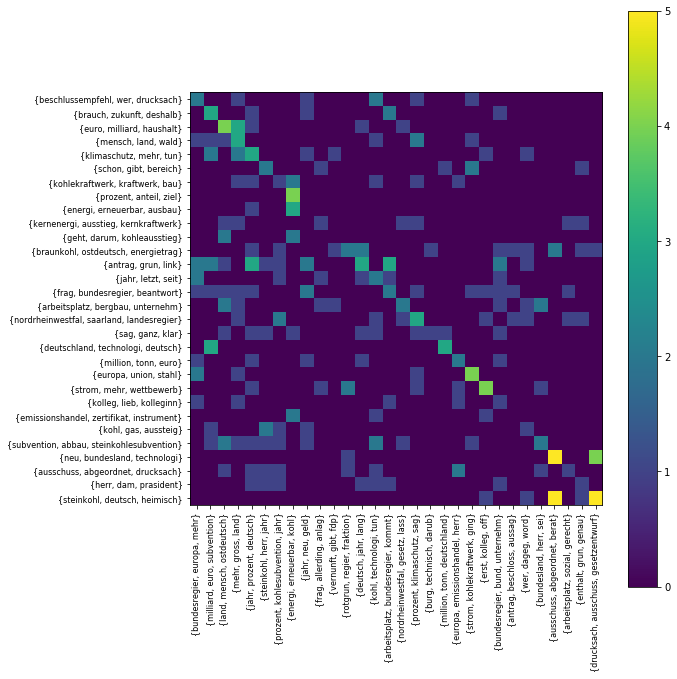

In [31]:
# Compares NMF and LDA methods for K=30
% matplotlib inline
runs = [run_id1, run_id2]
runs = RunStats.objects.filter(pk__in=runs).order_by('K')

res_tw, ss, score_matrix = compare_topic_queryset(runs, order_by_str='-score')

options = {'fname': "/home/leey/coal-discourse"}
save_res(runs, [res_tw,ss], options)

#draw_score_matrix(score_matrix, topics1, topics2, match=True, filename="topword_score_matrix_{}_{}_K{}.pdf".format(search_word, method, K))
draw_score_matrix(score_matrix, topics1, topics2, match=True, filename="topword_score_matrix_{}_{}_vs_{}_K{}.png".format(search_word, method1, method2,  K))

In [26]:
K=40
search_word = "Kohle"
run_id1 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method1, K=K).run_id
run_id2 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method2, K=K).run_id

stat1 = RunStats.objects.get(pk=run_id1)
topics1 = Topic.objects.filter(run_id=stat1.parent_run_id).order_by('-score')

stat2 = RunStats.objects.get(pk=run_id2)
topics2 = Topic.objects.filter(run_id=stat2.parent_run_id).order_by('-score')

['run_970_topics_40', 'scores_970', 'similarity_970-974', 'run_974_topics_40', 'scores_974']
C2:C40
matching sum:	84.0
max rows:	90.0
max cols:	99.0


0

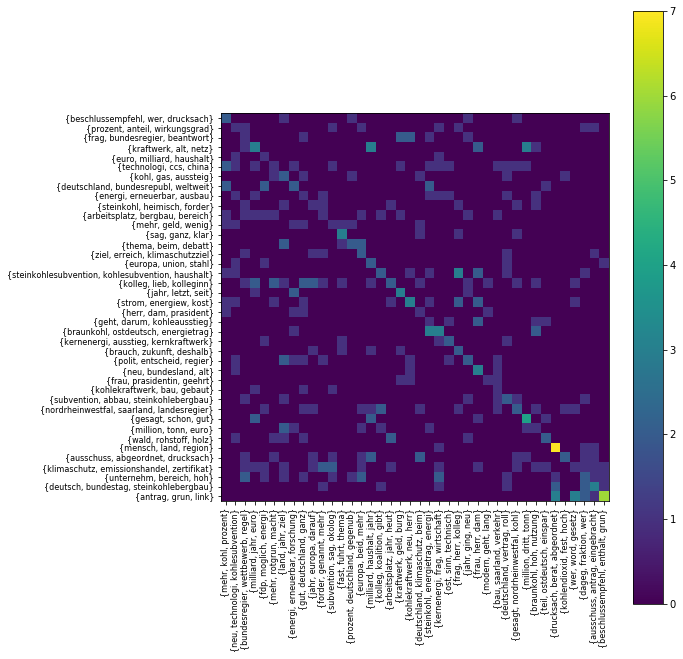

In [27]:
# Compares NMF and LDA methods for K=30
% matplotlib inline
runs = [run_id1, run_id2]
runs = RunStats.objects.filter(pk__in=runs).order_by('K')

res_tw, ss, score_matrix = compare_topic_queryset(runs, order_by_str='-score')

options = {'fname': "/home/leey/coal-discourse"}
save_res(runs, [res_tw,ss], options)

#draw_score_matrix(score_matrix, topics1, topics2, match=True, filename="topword_score_matrix_{}_{}_K{}.pdf".format(search_word, method, K))
draw_score_matrix(score_matrix, topics1, topics2, match=True, filename="topword_score_matrix_{}_{}_vs_{}_K{}.png".format(search_word, method1, method2,  K))

In [49]:
K=50
#method = 'NM'
search_word = "Kohle"
run_id1 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method1, K=K).run_id
run_id2 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method2, K=K).run_id

stat1 = RunStats.objects.get(pk=run_id1)
topics1 = Topic.objects.filter(run_id=stat1.parent_run_id).order_by('-score')

stat2 = RunStats.objects.get(pk=run_id2)
topics2 = Topic.objects.filter(run_id=stat2.parent_run_id).order_by('-score')

['run_971_topics_50', 'scores_971', 'similarity_971-975', 'run_975_topics_50', 'scores_975']
C2:C50
matching sum:	102.0
max rows:	112.0
max cols:	112.0


0

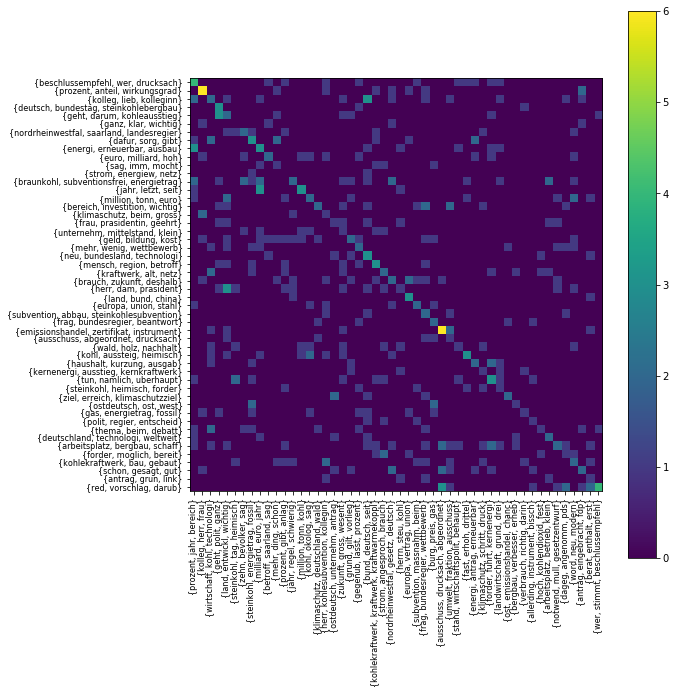

In [50]:
# Compares NMF and LDA methods for K=50
% matplotlib inline
runs = [run_id1, run_id2]
runs = RunStats.objects.filter(pk__in=runs).order_by('K')

res_tw, ss, score_matrix = compare_topic_queryset(runs, order_by_str='-score')

options = {'fname': "/home/leey/coal-discourse"}
save_res(runs, [res_tw,ss], options)

#draw_score_matrix(score_matrix, topics1, topics2, match=True, filename="topword_score_matrix_{}_{}_K{}.pdf".format(search_word, method, K))
draw_score_matrix(score_matrix, topics1, topics2, match=True, filename="topword_score_matrix_{}_{}_vs_{}_K{}.png".format(search_word, method1, method2,  K))

## NM and LD using score product ##

In [62]:
K=20
search_word = "Kohle"
run_id1 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method1, K=K).run_id
run_id2 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method2, K=K).run_id

stat1 = RunStats.objects.get(pk=run_id1)
topics1 = Topic.objects.filter(run_id=stat1.parent_run_id).order_by('-score')

stat2 = RunStats.objects.get(pk=run_id2)
topics2 = Topic.objects.filter(run_id=stat2.parent_run_id).order_by('-score')

['run_968_topics_20', 'scores_968', 'similarity_968-972', 'run_972_topics_20', 'scores_972']
C2:C20
['run_968_topics_20', 'scores_968', 'similarity_968-972', 'run_972_topics_20', 'scores_972']
matching sum:	4225286.826540008
max rows:	5171910.629153676
max cols:	5833555.42106387


0

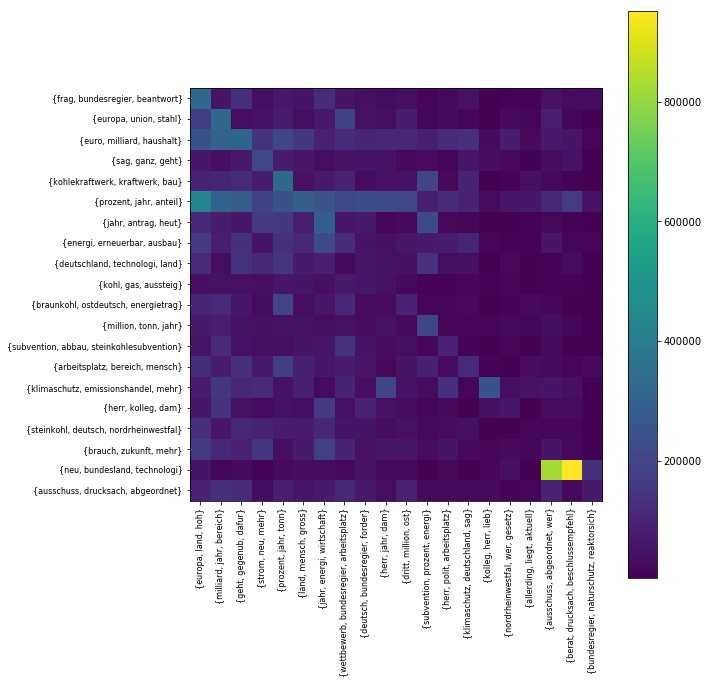

In [63]:
#Score Product comparison method
% matplotlib inline

runs = [run_id1, run_id2]
runs = RunStats.objects.filter(pk__in=runs).order_by('K')

res_tw, ss, score_matrix = compare_topic_queryset(runs, order_by_str='-score')

options = {'fname': "/home/leey/coal-discourse"}
save_res(runs, [res_tw,ss], options)

#Score Product comparison method
res, ss, score_prod_matrix = compare_topic_queryset(runs, method="score_product", order_by_str='-score')

#draw_score_matrix(score_prod_matrix, topics1, topics2, match=True, filename="prod_score_matrix_{}_{}_K{}.pdf".format(search_word, method, K))
draw_score_matrix(score_prod_matrix, topics1, topics2, match=True, filename="prod_score_matrix_{}_{}_vs_{}_K{}.png".format(search_word, method1, method2, K))

In [70]:
K=30
search_word = "Kohle"
run_id1 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method1, K=K).run_id
run_id2 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method2, K=K).run_id

stat1 = RunStats.objects.get(pk=run_id1)
topics1 = Topic.objects.filter(run_id=stat1.parent_run_id).order_by('-score')

stat2 = RunStats.objects.get(pk=run_id2)
topics2 = Topic.objects.filter(run_id=stat2.parent_run_id).order_by('-score')

['run_969_topics_30', 'scores_969', 'similarity_969-973', 'run_973_topics_30', 'scores_973']
C2:C30
['run_969_topics_30', 'scores_969', 'similarity_969-973', 'run_973_topics_30', 'scores_973']
matching sum:	5557778.378122282
max rows:	6930892.483574297
max cols:	6345052.942735613


0

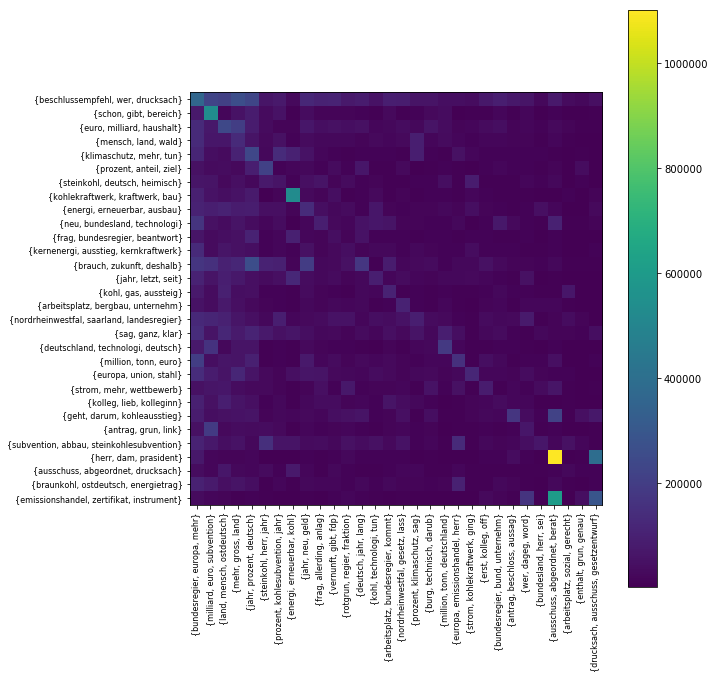

In [71]:
#Score Product comparison method
% matplotlib inline

runs = [run_id1, run_id2]
runs = RunStats.objects.filter(pk__in=runs).order_by('K')

res_tw, ss, score_matrix = compare_topic_queryset(runs, order_by_str='-score')

options = {'fname': "/home/leey/coal-discourse"}
save_res(runs, [res_tw,ss], options)

#Score Product comparison method
res, ss, score_prod_matrix = compare_topic_queryset(runs, method="score_product", order_by_str='-score')

#draw_score_matrix(score_prod_matrix, topics1, topics2, match=True, filename="prod_score_matrix_{}_{}_K{}.pdf".format(search_word, method, K))
draw_score_matrix(score_prod_matrix, topics1, topics2, match=True, filename="prod_score_matrix_{}_{}_vs_{}_K{}.png".format(search_word, method1, method2, K))

In [72]:
K=40
search_word = "Kohle"
run_id1 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method1, K=K).run_id
run_id2 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method2, K=K).run_id

stat1 = RunStats.objects.get(pk=run_id1)
topics1 = Topic.objects.filter(run_id=stat1.parent_run_id).order_by('-score')

stat2 = RunStats.objects.get(pk=run_id2)
topics2 = Topic.objects.filter(run_id=stat2.parent_run_id).order_by('-score')

['run_970_topics_40', 'scores_970', 'similarity_970-974', 'run_974_topics_40', 'scores_974']
C2:C40
['run_970_topics_40', 'scores_970', 'similarity_970-974', 'run_974_topics_40', 'scores_974']
matching sum:	5607145.014950038
max rows:	6321968.965613244
max cols:	6482418.722154951


0

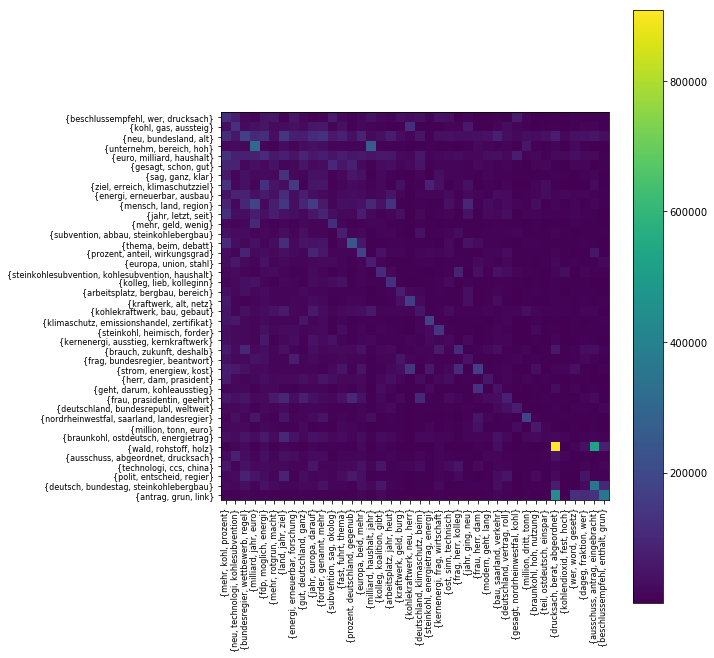

In [73]:
#Score Product comparison method
% matplotlib inline

runs = [run_id1, run_id2]
runs = RunStats.objects.filter(pk__in=runs).order_by('K')

res_tw, ss, score_matrix = compare_topic_queryset(runs, order_by_str='-score')

options = {'fname': "/home/leey/coal-discourse"}
save_res(runs, [res_tw,ss], options)

#Score Product comparison method
res, ss, score_prod_matrix = compare_topic_queryset(runs, method="score_product", order_by_str='-score')

#draw_score_matrix(score_prod_matrix, topics1, topics2, match=True, filename="prod_score_matrix_{}_{}_K{}.pdf".format(search_word, method, K))
draw_score_matrix(score_prod_matrix, topics1, topics2, match=True, filename="prod_score_matrix_{}_{}_vs_{}_K{}.png".format(search_word, method1, method2, K))

In [74]:
K=50
search_word = "Kohle"
run_id1 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method1, K=K).run_id
run_id2 = RunStats.objects.get(psearch__title="{} tei paragraph".format(search_word), method=method2, K=K).run_id

stat1 = RunStats.objects.get(pk=run_id1)
topics1 = Topic.objects.filter(run_id=stat1.parent_run_id).order_by('-score')

stat2 = RunStats.objects.get(pk=run_id2)
topics2 = Topic.objects.filter(run_id=stat2.parent_run_id).order_by('-score')

['run_971_topics_50', 'scores_971', 'similarity_971-975', 'run_975_topics_50', 'scores_975']
C2:C50
['run_971_topics_50', 'scores_971', 'similarity_971-975', 'run_975_topics_50', 'scores_975']
matching sum:	6922195.6792939
max rows:	8261023.92900286
max cols:	7481744.827788654


0

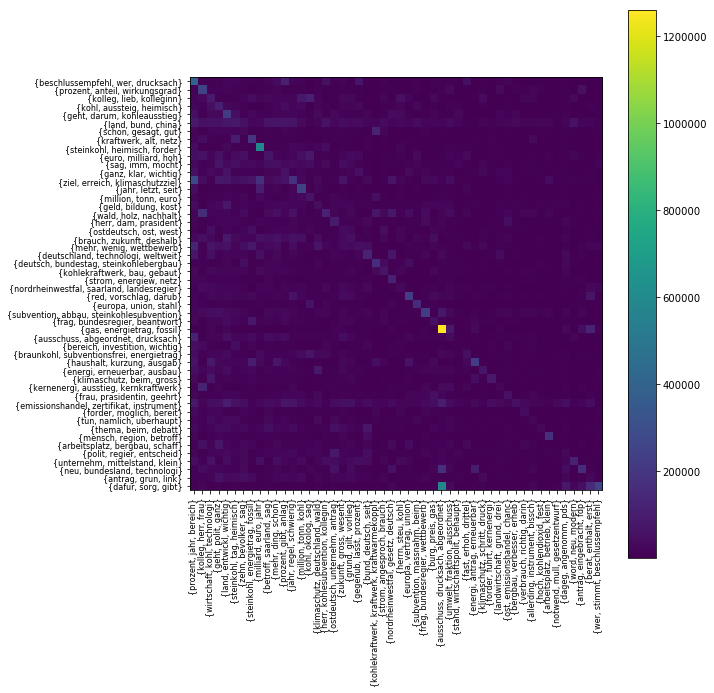

In [75]:
#Score Product comparison method
% matplotlib inline

runs = [run_id1, run_id2]
runs = RunStats.objects.filter(pk__in=runs).order_by('K')

res_tw, ss, score_matrix = compare_topic_queryset(runs, order_by_str='-score')

options = {'fname': "/home/leey/coal-discourse"}
save_res(runs, [res_tw,ss], options)

#Score Product comparison method
res, ss, score_prod_matrix = compare_topic_queryset(runs, method="score_product", order_by_str='-score')

#draw_score_matrix(score_prod_matrix, topics1, topics2, match=True, filename="prod_score_matrix_{}_{}_K{}.pdf".format(search_word, method, K))
draw_score_matrix(score_prod_matrix, topics1, topics2, match=True, filename="prod_score_matrix_{}_{}_vs_{}_K{}.png".format(search_word, method1, method2, K))